- title: SVD Series Part 3: Linear Regression
- date: 2020-09-14 
- category: Numerical Analysis
- tags: linear algebra, regression
- slug: svd-regression
- authors: Anas Bouzid
- summary: Linear regression is one of the most popular modeling techniques because, in addition to revealing the relationship between variables (like correlation), it provides a simple model in the form of a linear equation that can be used to predict the value of a response variable based on data samples of the predictor variable. In this entry, we will explore how we can use SVDs to build linear regression models from data.

## SVD for Linear Regression

A very useful application of Singular Value Decomposition is solving linear systems of equations.

## Linear system of equations

$$
\begin{align}
\underbrace{A}_{\substack{known\\ coefficients}} \underbrace{x}_{\substack{unknown\\ variables}} = \underbrace{b}_{\substack{known\\ constants}}
\end{align}
$$

The case where $A$ is a square invertible matrix is of popular focus because $x$ is easily obtained by multiplying both sides by the inverse of $A$ (on the left). Simply put, the solution in this case is just $x = A^{-1}b$.


SVD allows us to generalize this solution to non-square $A$ matrices which opens up a much larger class of linear systems including many that arise in data analysis and data modeling.

For the moment, the focus will be on two classes of non-square matrices: underdetermined and overdetermined.

1.   Underdetermined is the case where the non-square matrix $A$ has dimensions $n<m$. The matrix is called "underdetermined" because depending on the values inside the matrix, the situation often arises where there are infinite solutions to a linear system involving $A$.
2.  Overdetermined is the case where $A$ has dimensions $n<m$. The matrix is called "overdetermined" because it provides the coefficients of a number of expressions containing the unknown components of $x$ where the number of expressions is larger than the number of unknown components. This results in the possibility that there are no solutions to the linear equation.



Singular Value Decomposition is going to allow us to approximately invert the non-square $A$ matrix i.e. compute the pseudo-inverse and with that we can obtain the best fit $x$ to the linear equation. This best fit will either come as close as possible to solving the equation for the overdetermined case or provide the solution with the minimum 2-norm for the underdetermined case.  

With the three matricies obtained from Singular Value Decomposition, we have that

\begin{align*}
A = U \Sigma V^T.
\end{align*}

Given that the inverse of a real-valued unitary matrix is just its transpose, we would expect the inverse of $A$ to be,

\begin{align*}
A^{-1} = V \Sigma^{-1} U^T.
\end{align*}
 
We can be check that we do indeed have the pseudo-inverse,

\begin{align*}
A^{-1}A = V \Sigma^{-1} U^T U \Sigma V^T = \mathbb{I}.
\end{align*}

Solving the linear equation using the inverse amounts to just multiplying both sides with it,

\begin{align*}
A^{-1} Ax &= A^{-1}b\\
&↓\\
\mathbb{I} x &= A^{-1} b\\
&↓ \\
\tilde{x} &= V\Sigma^{-1}U^T b 
\end{align*}

Its important to emphasize again that whether or not the pseudo-inverse will give us a solution or an approximation depends on the matrix $A$. For this reason, we use $\tilde{x}$ to denote the solution obtained using the pseudo-inverse.

Additionally, for the overdetermined case where there are no solutions to the linear equation, the approximation obtained using the pseudo-inverse constructed from the output of SVD ($U$, $V$ and $Σ$) will be the one that minimizes the least squares norm $|Ax -b |_{2}$. 



***This means that we have a SVD-based method for performing least squares regression!***

For verification, it can be easily shown that for the overdetermined case, $A\tilde{x}$ is the projection of $b$ onto the span of $A$. In otherwords, it gives the part of $b$ that exists in the column space of $A$. In *even* simpler terms, it gives the greatest part of $b$ that can be constructed from some linear combination of the columns of $A$. The "greatest part" here refers to a $\tilde{b}$ where the sum of the square of the error of each component (the amount away from the actual components of $b$) is minimum.

## Testing SVD method for linear regression

If we can create a set of points for which the linear regression output is already known (or set beforehand), then we can test our SVD-based regression method by comparing its output to the known output. 

Here, we choose a line by setting the value of its slope (and assume zero intercept) and then add points that are above the line. The amount above the line is random (but within a set range). Obviously, performing linear regression on these points which are all above the line will not return the line slope parameter in the results. We fix this by adding points that are equal amounts below the line. 

We expect that performing linear regression on this set of points will return exactly the parameters that define the line we chose and used to create the points in the first place.

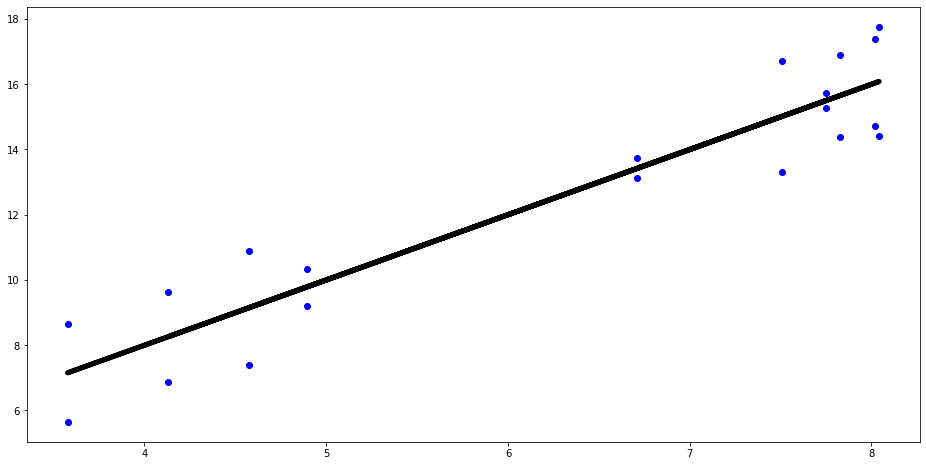

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(16, 8)

number_of_points = 10
line_slope = 2
line_intercept = 0
x_start = 1
x_range = 9
y_variation_amplitude = 2

random_x_values = np.random.rand(number_of_points)*x_range + x_start
line_y_values = random_x_values*line_slope + line_intercept
y_variations = np.random.rand(number_of_points)*y_variation_amplitude
random_y_values_above = line_y_values + y_variations
random_y_values_below = line_y_values - y_variations

random_x_values_doubled = np.append(random_x_values, random_x_values)
random_y_values = np.append(random_y_values_above, random_y_values_below)

plt.plot(random_x_values, line_y_values, "-", Color='k', linewidth=5)
plt.plot(random_x_values_doubled, random_y_values,"o", Color='b')

plt.show()


Before applying the method using SVD, we need to reframe the data ($x$ and $y$ values) in terms of the linear equation $Ax=b$ where $x$ is the set of equation parameters (one for each independent variable) and $b$ is the dependent quantity $y$.

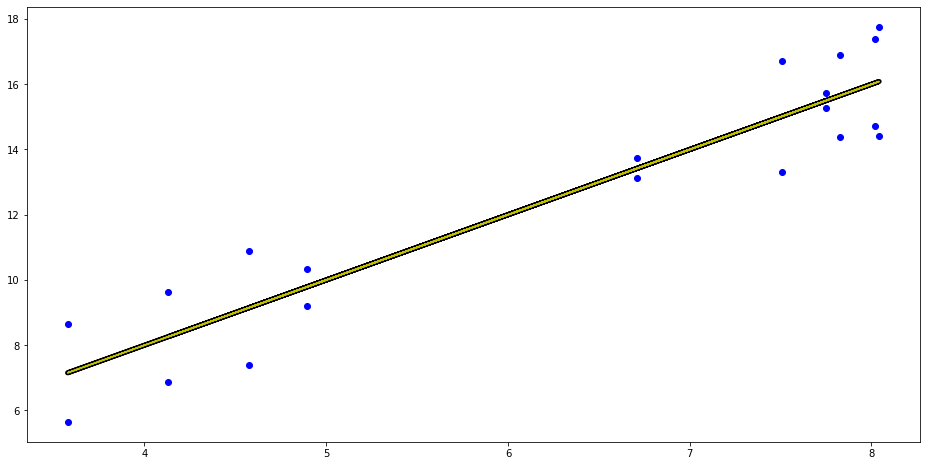

In [ ]:
A = random_x_values_doubled.reshape(-1,1)
b = random_y_values.reshape(-1,1)

U, Sigma, V_T = np.linalg.svd(A, full_matrices=False)

V = V_T.T
Sigma_I = np.linalg.inv(np.diag(Sigma))

x_tilde = V@Sigma_I@U.T@b      #@ is matrix multiplication

plt.plot(random_x_values, line_y_values, "-", color='k', linewidth=5)
plt.plot(random_x_values_doubled, random_y_values,"o", Color='b')
plt.plot(A, A*x_tilde,'--', Color='y')

plt.show()


The output of the linear regression $\tilde{x}$ should contain the equation parameters ie the quantities that are multiplied with the independent variables. Since there is only one independent variable, we should get back the slope. We can easily see that $\tilde{x}$ contains the slope we chose.

In [ ]:
print("Number of parameters in x_tilde is " + str(len(x_tilde)))
print("This parameter is " + str(x_tilde[0,0]) + " which is the slope we set")

Number of parameters in x_tilde is 1
This parameter is 2.0000000000000004 which is the slope we set
